In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/diabetes.csv")
df = df.drop_duplicates()
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Results  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Results
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results']


In [5]:
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]==0).sum())

Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [6]:

temp = df[df['BloodPressure']!=0.000000]
df['BloodPressure'] = df['BloodPressure'].replace( 0.000000 , temp.mean()[0])

temp = df[df['Glucose']!=0.000000]
df['Glucose'] = df['Glucose'].replace( 0.000000 , temp.mean()[0])

temp = df[df['BMI']!=0.000000]
df['BMI'] = df['BMI'].replace( 0.000000 , temp.mean()[0])


print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]==0).sum())


Glucose                       0
BloodPressure                 0
SkinThickness               215
Insulin                     359
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [7]:
print(df.max())

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness               110.00
Insulin                     744.00
BMI                          80.60
DiabetesPedigreeFunction      2.42
Age                          81.00
Results                       1.00
dtype: float64


In [8]:
print(df.min())

Pregnancies                  0.000000
Glucose                      3.759134
BloodPressure                3.773239
SkinThickness                0.000000
Insulin                      0.000000
BMI                          3.756131
DiabetesPedigreeFunction     0.078000
Age                         21.000000
Results                      0.000000
dtype: float64


In [9]:
print(df.max() - df.min())

Pregnancies                  17.000000
Glucose                     195.240866
BloodPressure               118.226761
SkinThickness               110.000000
Insulin                     744.000000
BMI                          76.843869
DiabetesPedigreeFunction      2.342000
Age                          60.000000
Results                       1.000000
dtype: float64


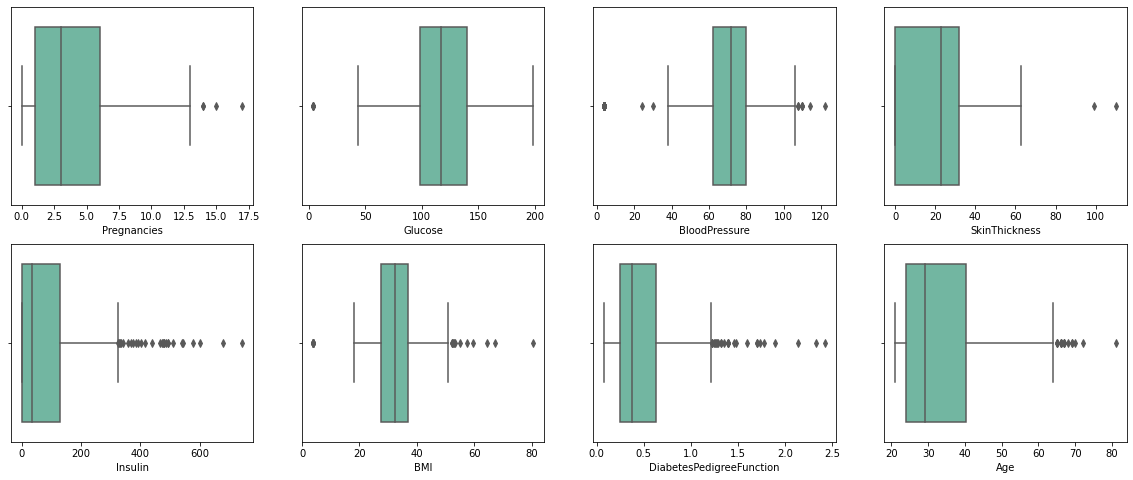

In [10]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:-1]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    else:
        y_ += 1

In [11]:
for x in ['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [12]:


temp = df[df['BloodPressure']!=np.nan]
df['BloodPressure'] = df['BloodPressure'].replace( np.nan , temp.mean()[0])


temp = df[df['Insulin']!=np.nan]
df['Insulin'] = df['Insulin'].replace( np.nan , temp.mean()[0])

temp = df[df['BMI']!=np.nan]
df['BMI'] = df['BMI'].replace( np.nan , temp.mean()[0])

temp = df[df['DiabetesPedigreeFunction']!=np.nan]
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace( np.nan , temp.mean()[0])


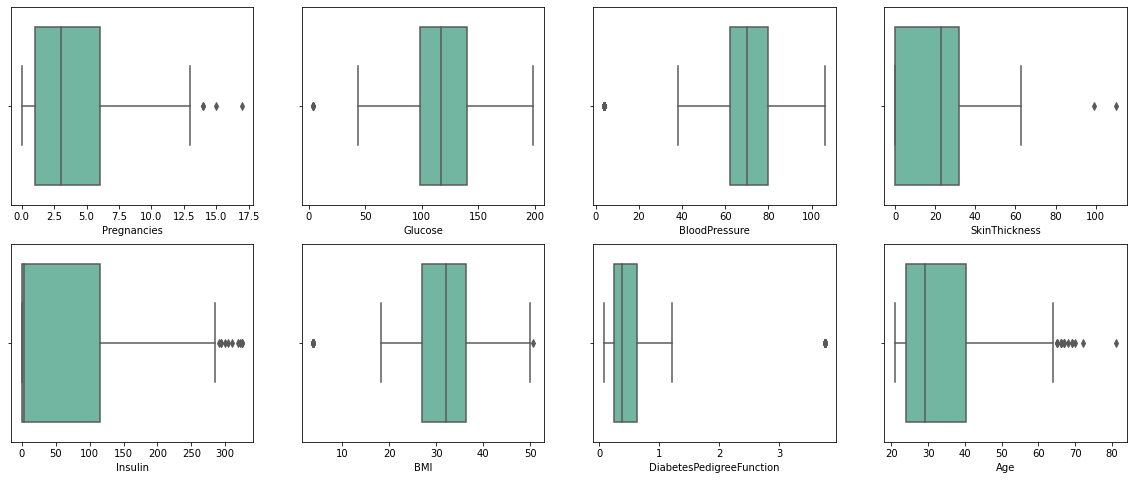

In [13]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:-1]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    else:
        y_ += 1

In [14]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Results'],
      dtype='object')
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.687565       0.569671       0.318182  0.000000  0.635762   
1     0.000000  0.410984       0.765275       0.281818  0.384615  0.733744   
2     0.000000  0.723419       0.000000       0.000000  0.000000  0.861547   
3     0.000000  0.672200       0.628352       0.381818  0.769231  0.821076   
4     0.058824  0.692687       0.569671       0.372727  0.011547  0.786995   

   DiabetesPedigreeFunction       Age  Results  
0                  0.013334  0.433333      1.0  
1                  0.042180  0.033333      0.0  
2                  0.150217  0.166667      1.0  
3                  0.078102  0.050000      1.0  
4                  0.124636  0.000000      0.0  


In [15]:
print(df_01.max() - df_01.min())

Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
Results                     1.0
dtype: float64


In [16]:
x = df_01.drop(["Results"], axis =1);
y = df_01["Results"]
print(y.value_counts())

0.0    491
1.0    253
Name: Results, dtype: int64


(array([491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

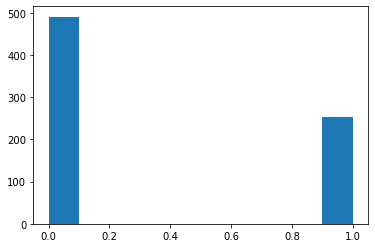

In [17]:
plt.hist(y)

0.0    361
1.0    253
Name: Results, dtype: int64


(array([361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

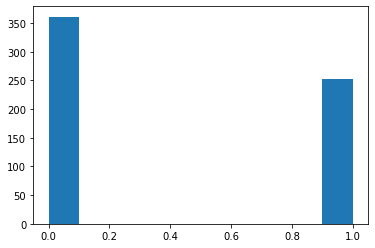

In [18]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    361
1.0    361
Name: Results, dtype: int64


(array([361.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 361.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

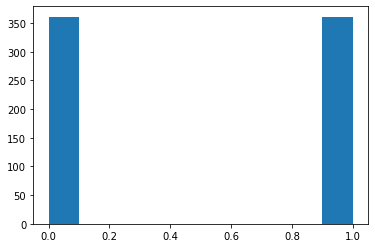

In [19]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [20]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {}
Accuracy :  75.493
Standed deviation :  5.822


In [21]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'random_state': 1}
Accuracy :  78.824
Standed deviation :  5.152


In [22]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'n_neighbors': 3}
Accuracy :  77.177
Standed deviation :  7.265


In [23]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {'max_iter': 100}
Accuracy :  74.100
Standed deviation :  3.973


In [24]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {}
Accuracy :  63.712
Standed deviation :  3.208


In [25]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {'kernel': 'rbf'}
Accuracy :  77.852
Standed deviation :  5.008


In [26]:
# creating a Random forest classifier

param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

rf = RandomForestClassifier()
gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'max_depth': 300, 'max_features': 5, 'n_estimators': 100}
Accuracy :  82.142
Standed deviation :  4.041
